<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)" data-toc-modified-id="-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)</center></a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Task-0." data-toc-modified-id="Task-0.-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span>Task 0.</a></span></li><li><span><a href="#Task-1." data-toc-modified-id="Task-1.-1.0.0.2"><span class="toc-item-num">1.0.0.2&nbsp;&nbsp;</span>Task 1.</a></span></li><li><span><a href="#Task-2:" data-toc-modified-id="Task-2:-1.0.0.3"><span class="toc-item-num">1.0.0.3&nbsp;&nbsp;</span>Task 2:</a></span></li><li><span><a href="#Task-3:" data-toc-modified-id="Task-3:-1.0.0.4"><span class="toc-item-num">1.0.0.4&nbsp;&nbsp;</span>Task 3:</a></span></li><li><span><a href="#Task-4:" data-toc-modified-id="Task-4:-1.0.0.5"><span class="toc-item-num">1.0.0.5&nbsp;&nbsp;</span>Task 4:</a></span></li><li><span><a href="#Task-5:" data-toc-modified-id="Task-5:-1.0.0.6"><span class="toc-item-num">1.0.0.6&nbsp;&nbsp;</span>Task 5:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.7"><span class="toc-item-num">1.0.0.7&nbsp;&nbsp;</span>Вопросы:</a></span></li><li><span><a href="#Task-6:" data-toc-modified-id="Task-6:-1.0.0.8"><span class="toc-item-num">1.0.0.8&nbsp;&nbsp;</span>Task 6:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.9"><span class="toc-item-num">1.0.0.9&nbsp;&nbsp;</span>Вопросы:</a></span></li></ul></li></ul></li></ul></li></ul></div>

# <center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Ещё раз (как и в задании 1) считайте в переменные tr_mcc_codes, tr_types, transactions и customers_gender_train. В transactions опять считайте только первые 1 000 000 строк.

In [2]:
tr_mcc_codes = pd.read_csv('data1/tr_mcc_codes.csv', sep=';')
tr_types = pd.read_csv('data1/tr_types.csv', sep=';')
gender_train = pd.read_csv('data1/gender_train.csv')
transactions = pd.read_csv('data1/transactions.csv', nrows=1_000_000)

#### Task 0.
Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с customers_gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [3]:
merged_df = pd.merge(transactions, gender_train, on='customer_id', how='left')
merged_df = pd.merge(merged_df, tr_mcc_codes, on='mcc_code', how='inner')
merged_df = pd.merge(merged_df, tr_types, on='tr_type', how='inner')
del gender_train, tr_types, tr_mcc_codes
merged_df

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
...,...,...,...,...,...,...,...,...,...
999579,36837532,18 23:38:60,3000,6000,1297824.89,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ
999580,6808459,206 19:00:10,3000,6000,124693.24,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ
999581,83759123,90 22:40:57,3000,6000,218976.79,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ
999582,89619970,104 23:39:35,3000,6000,408307.49,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ


#### Task 1.
1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount). (*)

Выведите ответ в виде вещественного числа, округлённого до двух знаков после запятой, отделив дробную часть точкой в формате "123.45"

##### Пояснения:
(\*) Если в результате для мужчин получились значения [-1,-3,-5], а для женщин [-1,-2,-3],  
то модуль разницы между средними арифметическими -3 и -2 будет равен 1.

(\**) Обратите внимание, что для вычисления модуля разности точных знаний о том,  
какой класc относится к мужчинам, а какой - к женщинам, пока не требуется.

(\***) Округление не нужно производить отдельно по средним тратам женщин и мужчин, а только в самом конце, когда получите значение модуля разницы трат.

In [4]:
negative_amounts = merged_df[merged_df['amount'] < 0]
mean_mens_womens = negative_amounts.groupby('gender')['amount'].mean()
differ = abs(mean_mens_womens[1] - mean_mens_womens[0])
print(f'Ответ {differ:.2f}')

Ответ 32718.05


#### Task 2:
1. Создайте новый столбец - mcc_code+tr_type, сконкатенировав значения из соответствующих столбцов. (\*)
2. Оставьте только наблюдения с отрицательным значением amount. Посчитайте дисперсию по категориям получившегося столбца mcc_code+tr_type, в которых количество наблюдений >= 10. 
3. Определите отношение максимальной дисперсии к минимальной.

Выведите ответ в виде вещественного числа, округлённого до ближайшего целого в формате "123456" без дробной части.

##### Пояснения:
(\*) Для конкатенации значений в столбцах можно использовать метод .astype(str) для серии и складывать соответствующие серии. Либо же применять apply к строкам датафрейма, прописывая логику преобразования и конкатенации значений внутри.

(\**) Для одновременного подсчета количества наблюдений и дисперсии по категориям можно воспользоваться функцией .agg()

In [5]:
# Добавляем новый столбец мсскод и тртупе
merged_df['mcc_code_tr_type'] = merged_df['mcc_code'].astype(str) + merged_df['tr_type'].astype(str)
# Выбираем только отрицательные
negative_amounts = merged_df[merged_df['amount'] < 0]
# Группируем по мсскодтртупе и добавляем количество
agg_result = negative_amounts.groupby('mcc_code_tr_type')['amount'].agg(['var', 'count'])
# Фильтруем где значений >= 10
filtered_result = agg_result[agg_result['count'] >= 10]

max_variance = filtered_result['var'].max()
min_variance = filtered_result['var'].min()
ratio = max_variance / min_variance

print('Ответ', round(ratio))

Ответ 9170599


#### Task 3:
1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 5 транзакций для мужчин и для женщин, наименьших среди всех транзакций по полученным значениям "max_income". (\*)
2. Выделите среди них те, которые встречаются одновременно и у мужчин, и у женщин:
    - 1) Покупка. POS ТУ СБ РФ	
    - 2) Списание после проведения претензионной работы	
    - 3) Плата за получение наличных. Россия	
    - 4) Перевод на карту/ с карты через АТМ (со взиманием комиссии с отправителя) по счету в овердрафте	
    - 5) Плата за получение наличных в АТМ. Россия	 
    - 6) Наличные. Зарубеж. банк	
    - 7) Возврат покупки. POS ТУ Россия

##### Пояснения:
(\*) Если максимальные суммы приходов по каким-то типам были равны [1,2,3,4,5,6,7,8], то 5 минимальных из них: [1,2,3,4,5]

In [6]:
# Выбираем только положительные
sleep_table = merged_df[merged_df['amount'] > 0]
# Группируем данные по описанию транзакции и полу (gender) и находим максимальные суммы для каждой группы
max_income_by_type_gender = sleep_table.groupby(['tr_description', 'gender'])['amount'].max().reset_index()

top_5_men = max_income_by_type_gender[max_income_by_type_gender['gender'] == 1].nsmallest(5, 'amount')
top_5_women = max_income_by_type_gender[max_income_by_type_gender['gender'] == 0].nsmallest(5, 'amount')

# Объединяем результаты по описанию транзакции
common_transactions = pd.merge(top_5_men, top_5_women, on='tr_description', suffixes=('_men', '_women'))
common_transactions


,tr_description,gender_men,amount_men,gender_women,amount_women
0,Плата за получение наличных в АТМ. Россия,1.0,2245.92,0.0,2245.92


Ответ E

#### Task 4:
1. Выделите из поля tr_datetime относительный день tr_day (первое число до точного времени). (\*)
2. Отфильтруйте строки таким образом, чтобы оставить только те транзакции, у которых в соответствующий относительный день tr_day количество уникальных MCC кодов при транзакциях было больше 75 (можно воспользоваться функцией nunique())
3. Сгруппируйте полученный отфильтрованный датафрейм по MCC коду и полу, после чего, пронализировав результат, выберите верные варианты ответов ниже (\**): 
    - 1) gender == 0 - женщины, gender == 1 - мужчины
    - 2) gender == 1 - женщины, gender == 0 - мужчины
    - 3) Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин
    - 4) Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских
    - 5) Абсолютное значение медианы женских трат (расходов/приходов) в категории "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков" ниже мужских
    
##### Пояснения:
(\*) Для того, чтобы выделить всё, что стоит до первого пробела, можо использовать строковые методы для датафрейма - .str.split(), например. Либо же реализовывать логику выделения подстроки с помощью метода apply. <br>
(\**) Понять, какой класс к какому типу транзакций (мужские/женские) относится можно, если поизучать типичные для мужчин/женщин категории и сравнить средние/медианы расходов и/или приходов в них.

In [7]:
# Выделяем день из tr_datetim
merged_df['tr_day'] = merged_df['tr_datetime'].str.split().str[0]
# Филттруем строки по количеству уникальных MCC кодов в относительный день
unique_mcc_counts = merged_df.groupby('tr_day')['mcc_description'].nunique()
filtered_days = unique_mcc_counts[unique_mcc_counts > 75].index
filtered_df = merged_df[merged_df['tr_day'].isin(filtered_days)]
# Группируем по мсс коду и гендеру
grouped_df = filtered_df.groupby(['mcc_description', 'gender']).agg({'amount': 'median'}).reset_index()
# Оставляем только самые большие строки с расходами
filtered_grouped_df = grouped_df.loc[grouped_df.groupby(['mcc_description', 'gender'])['amount'].idxmax()]

print(filtered_grouped_df)
filtered_grouped_df.to_csv('datafull.csv',index=False)


                                       mcc_description  gender     amount
0                              Авиалинии, авиакомпании     0.0 -269822.97
1                              Авиалинии, авиакомпании     1.0 -232407.36
2    Авиалинии, авиакомпании, нигде более не класси...     0.0 -128129.49
3    Авиалинии, авиакомпании, нигде более не класси...     1.0 -194629.26
4                                     Автобусные линии     0.0  -31038.56
..                                                 ...     ...        ...
337                                             Штрафы     0.0  -11903.35
338                                             Штрафы     1.0  -11678.76
339  Штучные товары, галантерея и другие текстильны...     0.0   -7186.93
340                 Электрические части и оборудование     0.0  -93963.50
341                 Электрические части и оборудование     1.0  -16414.61

[342 rows x 3 columns]


Ответ: B,D

#### Task 5:
1. Разбейте расходы (отрицательные значения сумм) на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low'. (\*)
2. Оставшиеся неотрицательные траты отнесите к категории 'Income'.
(воспользуйтесь функцией .cat.add_categories('Income') для того, чтобы добавить новую категорию 'Income' к категориям 'Very High', 'High', 'Middle', 'Low', 'Very Low', а затем заполните пустые значения новой категорией).
3. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
3. После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.
4. Отрисуйте полученные результаты, передав их в функцию plot_pivot_table, расположенную ниже.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
    - 2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
    - 3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
    - 4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
    - 5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.

##### Пояснения:
(\*) Обратите внимание, что в категории Very High Должны оказаться максимальные по модулю отрицательные транзакции. <br>
(\**) Например, для строки "0 10:23:26" час будет равен 10, а для строки "6 07:08:31"- 07. Можно воспользоваться функциями str.split() или str.find() и 
функцией .apply(lambda x: x[])

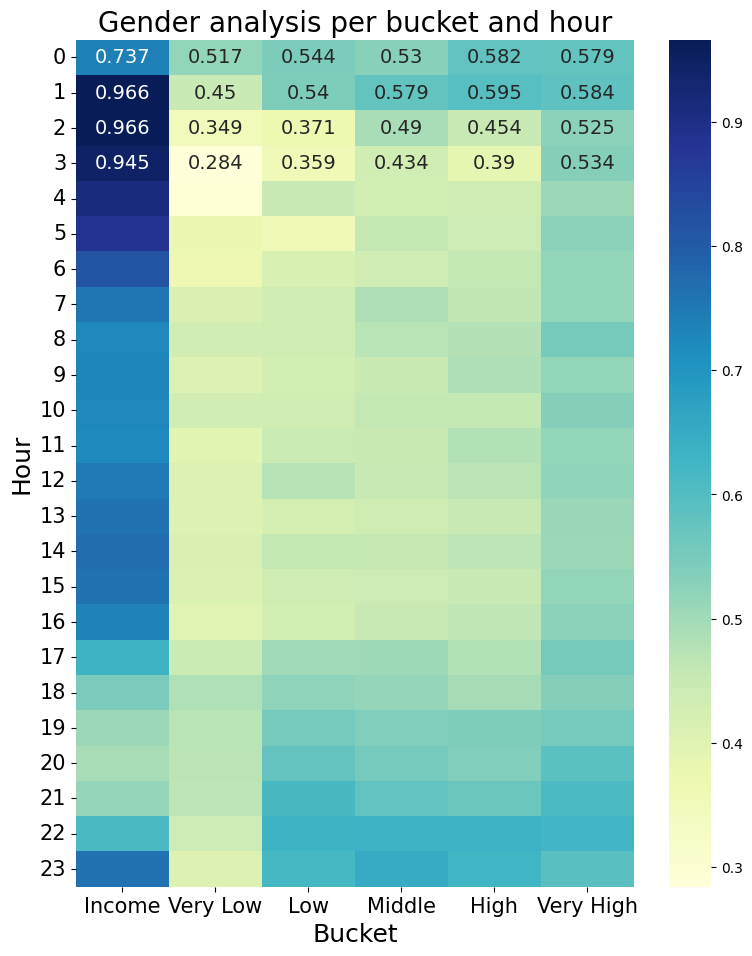

amount_bucket,Income,Very Low,Low,Middle,High,Very High
tr_hour,,,,,,
0,0.737148,0.517352,0.544178,0.530195,0.581928,0.578957
1,0.965922,0.450237,0.539936,0.578947,0.594737,0.583643
2,0.965834,0.349099,0.371014,0.489796,0.454183,0.524804
3,0.945011,0.284333,0.358879,0.434000,0.390374,0.533541
4,0.914473,0.290030,0.450858,0.428981,0.438721,0.505653
5,0.880842,0.374491,0.355699,0.459046,0.442200,0.524298
6,0.815352,0.366095,0.416000,0.431373,0.459614,0.516811
7,0.757958,0.412609,0.433982,0.485009,0.461418,0.518356
8,0.725043,0.431677,0.436529,0.472192,0.478275,0.552372


In [8]:
def plot_pivot_table(pivot_table):
    plt.figure(figsize=(9, 11))
    sns.heatmap(pivot_table, cmap="YlGnBu", annot=True,
                fmt='.3g', annot_kws={"fontsize": 14})
    plt.xticks(fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.xlabel('Bucket', size=18)
    plt.ylabel('Hour', fontsize=18)
    plt.title('Gender analysis per bucket and hour', fontsize=20)
    plt.show()

# Ставим для всех как положительное
merged_df['amount_bucket'] = 'Income'
# Заменяем значения в столбце amount_bucket для отрицательных значений amount
labels = ['Very High', 'High', 'Middle', 'Low', 'Very Low']
merged_df.loc[merged_df['amount'] < 0, 'amount_bucket'] = pd.qcut(merged_df.loc[merged_df['amount'] < 0, 'amount'], q=5, labels=labels)
# Разделяем дату и добавляем столбец с часом
merged_df['tr_hour'] = merged_df['tr_datetime'].str.split(' |:').str[1].astype(int)
# Сводная таблица для данных
pivot_table = merged_df.pivot_table(index='tr_hour', columns='amount_bucket', values='gender')
# Меняем столбцы (для удобства)
new_order = ['Income', 'Very Low', 'Low', 'Middle', 'High', 'Very High']
pivot_table = pivot_table[new_order]

plot_pivot_table(pivot_table)
pivot_table


Ответ: 1,3,5  
Не понятно почему после 4 строки не показывает значения.

#### Task 6:
1. Измените тип поля tr_day на int.
2. Выберите из transactions все MCC коды, которые встретились в выборке более чем 60000 раз.
3. Сгруппируйте отфильтрованный датафрейм по дню и MCC-коду, получая средние значения суммы amount.  
4. Далее отрисуйте зависимость средних сумм (может пригодится метод unstack()) по каждому из MCC-кодов по дням.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) 2 из полученных MCC-кодов связаны с финансовыми институтами
    - 2) 2 MCC кода, связанные со снятием наличности имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения)
    - 3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов
    - 4) Денежные переводы имеют как минимум 3 явных минимума средних
    - 5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию. 

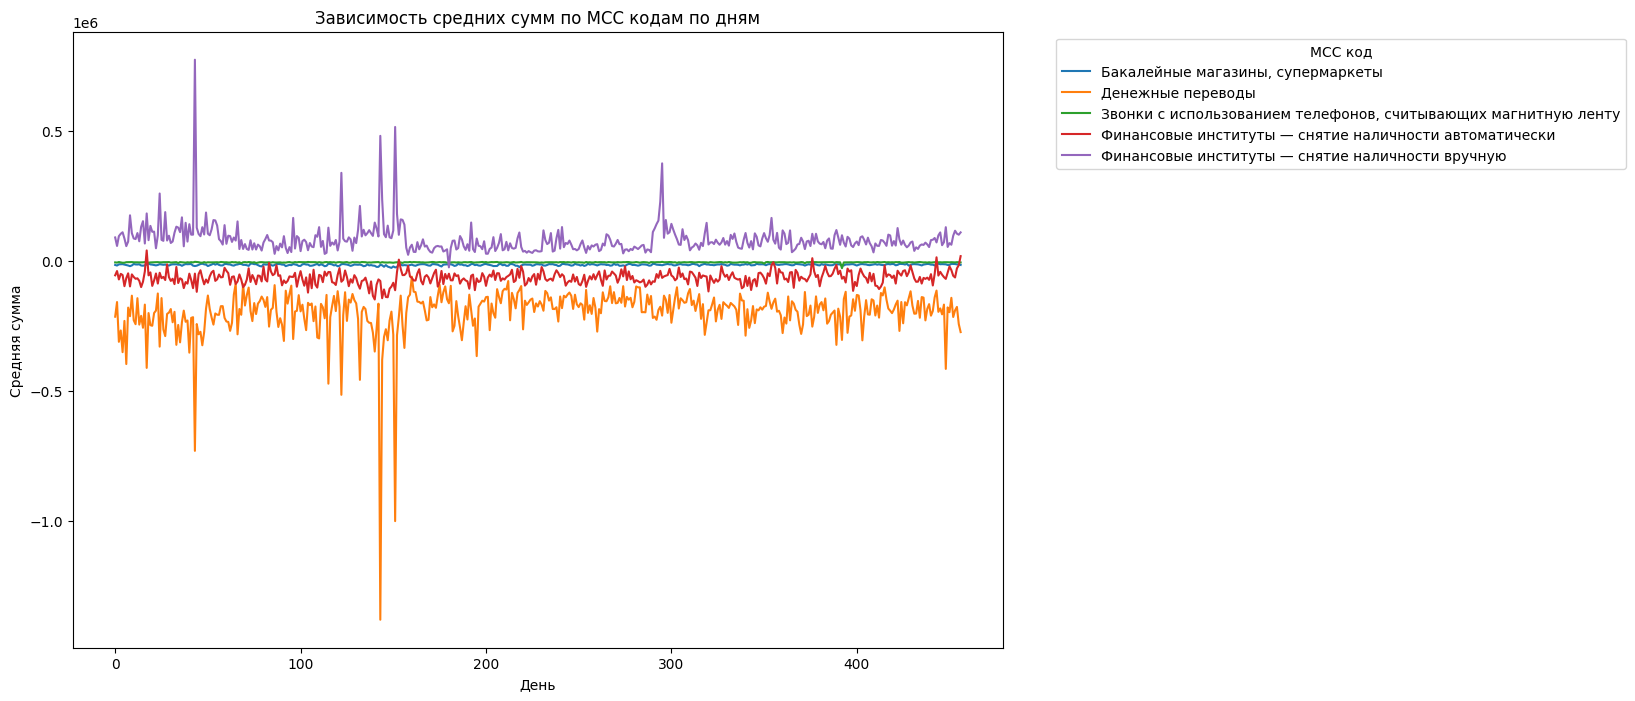

In [9]:
# Переводим день в инт
merged_df['tr_day'] = merged_df['tr_day'].astype(int)

# Фильтруем коды
popular_mcc = merged_df['mcc_description'].value_counts()[merged_df['mcc_description'].value_counts() > 60000].index

# Выбираем где мсс входит в топ
filtered_transactions = merged_df[merged_df['mcc_description'].isin(popular_mcc)]

# Группируем данные по дню и MCC коду, вычисляя средние значения суммы amount
grouped_data = filtered_transactions.groupby(['tr_day', 'mcc_description'])['amount'].mean().unstack()

# Отрисовываем зависимость средних сумм по MCC кодам по дням
grouped_data.plot(figsize=(12, 8))
plt.xlabel('День')
plt.ylabel('Средняя сумма')
plt.title('Зависимость средних сумм по MCC кодам по дням')
plt.legend(title='MCC код', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Ответ:1,2,4